In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')
pandas.set_option("display.max_columns", None)

melb_df = pandas.read_csv('https://www.famaf.unc.edu.ar/~nocampo043/no_nan_values_melb.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,suburb_count,CouncilArea_mode
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,137.374429,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,56,Yarra
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,56,Yarra
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,56,Yarra


In [2]:
melb_df = melb_df.drop(columns=["Address", "Date", "CouncilArea_mode"])

In [3]:
categorical_vars = ['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']
numerical_vars = list(set(melb_df.columns) - set(categorical_vars))

In [4]:
categorical_vars

['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

In [5]:
melb_df[categorical_vars]

,Suburb,Type,Method,SellerG,CouncilArea,Regionname
0,Abbotsford,h,S,Biggin,Yarra,Northern Metropolitan
1,Abbotsford,h,S,Biggin,Yarra,Northern Metropolitan
2,Abbotsford,h,SP,Biggin,Yarra,Northern Metropolitan
3,Abbotsford,h,PI,Biggin,Yarra,Northern Metropolitan
4,Abbotsford,h,VB,Nelson,Yarra,Northern Metropolitan
...,...,...,...,...,...,...
10691,Werribee,h,S,hockingstuart,Wyndham,Western Metropolitan
10692,Williamstown,h,SP,Williams,Hobsons Bay,Western Metropolitan
10693,Williamstown,h,S,Raine,Hobsons Bay,Western Metropolitan
10694,Williamstown,h,PI,Sweeney,Hobsons Bay,Western Metropolitan


## Exercise

- Encode all the categorical columns of `melb_df` using one hot encoder.
- Apply PCA to the numerical columns of `melb_df`.

## Solution: Using One Hot Encoder

We first import from scikit-learn the class One Hot Encoder, which implements
the codification algorithm. Then we make an instance of this class.

In [7]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

The categorical variables we have to encode are `Suburb`, `Type`, `Method`,
`SellerG`, `CouncilArea`, and `Regionname`. Each variables contains the
following number of unique categories.

In [19]:
nof_categ = 0
for categ in categorical_vars:
    print(f"Variable {categ} has {melb_df[categ].nunique()} categories")
    nof_categ += melb_df[categ].nunique()
print(f"Total number of categories {nof_categ}")


Variable Suburb has 109 categories
Variable Type has 3 categories
Variable Method has 5 categories
Variable SellerG has 219 categories
Variable CouncilArea has 22 categories
Variable Regionname has 4 categories
Total number of categories 362



So we have in total 362 categories counting all the variables. That indicates
that after applying one hot encoding, we should expect 362 columns for each row.

We proceed to fit the algorithm (which will save necessary states variables that
depend on our sample)

In [22]:
melb_df[categorical_vars].shape

(10696, 6)

In [20]:
ohe.fit(melb_df[categorical_vars])

OneHotEncoder()

Once the algorithm is fit, we can transform our original data with shape (10696,
6) to (10696, 362) as we expect after counting all the possible categories.

In [24]:
melb_df_enc = ohe.transform(melb_df[categorical_vars])

Note that melb_df_enc was before a pandas dataframe and now is a compressed
numpy sparse matrix. As the resultant matrix contains very few 1's and multiple
0's, the One Hot algorithm makes this optimization for us. If we want to
retrieve the uncompressed matrix, we can use the method `todense()`.

In [25]:
melb_df_enc.todense()

matrix([[1., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]])

In [26]:
melb_df_enc.todense().shape

(10696, 362)

## Solution: PCA

Let's now use PCA on the numerical data of our dataset. Similarly to One Hot
Encoder, scikit-learn has an implementation of the PCA algorithm utilizing a
class. So we start by making an instance of it.

In [27]:
melb_df[numerical_vars]

,Postcode,Propertycount,BuildingArea,Landsize,Rooms,Car,Price,suburb_count,Longtitude,Bedroom2,Distance,Lattitude,Bathroom
0,3067.0,4019.0,137.374429,202.0,2,1.0,1480000.0,56,144.99840,2.0,2.5,-37.79960,1.0
1,3067.0,4019.0,79.000000,156.0,2,0.0,1035000.0,56,144.99340,2.0,2.5,-37.80790,1.0
2,3067.0,4019.0,150.000000,134.0,3,0.0,1465000.0,56,144.99440,3.0,2.5,-37.80930,2.0
3,3067.0,4019.0,137.374429,94.0,3,1.0,850000.0,56,144.99690,3.0,2.5,-37.79690,2.0
4,3067.0,4019.0,142.000000,120.0,4,2.0,1600000.0,56,144.99410,3.0,2.5,-37.80720,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10691,3030.0,16166.0,172.000000,662.0,4,1.0,635000.0,50,144.64789,4.0,14.7,-37.89327,2.0
10692,3016.0,6380.0,133.000000,333.0,3,2.0,1031000.0,103,144.87904,3.0,6.8,-37.85927,2.0
10693,3016.0,6380.0,137.374429,436.0,3,4.0,1170000.0,103,144.88738,3.0,6.8,-37.85274,2.0
10694,3016.0,6380.0,157.000000,866.0,4,5.0,2500000.0,103,144.89299,4.0,6.8,-37.85908,1.0


When training the `PCA` class instance, scikit-learn takes care of centering the
data by subtracting the mean. However, it is also recommended to *standardize*
or at least *scale* the original array to ensure that all variables are in the
same units.


In [31]:
melb_df_num = (
    (melb_df[numerical_vars] - melb_df[numerical_vars].mean(axis=0)
) / melb_df[numerical_vars].std(axis=0))

In [32]:
melb_df_num

,Postcode,Propertycount,BuildingArea,Landsize,Rooms,Car,Price,suburb_count,Longtitude,Bedroom2,Distance,Lattitude,Bathroom
0,-0.452154,-0.924454,0.000000,-0.222499,-0.892052,-0.565460,0.884437,-1.042652,0.155207,-0.867214,-1.603407,0.082343,-0.726214
1,-0.452154,-0.924454,-0.598739,-0.258758,-0.892052,-1.634229,0.000278,-1.042652,0.092281,-0.867214,-1.603407,-0.043895,-0.726214
2,-0.452154,-0.924454,0.129499,-0.276100,0.181461,-1.634229,0.854634,-1.042652,0.104866,0.209730,-1.603407,-0.065188,0.817730
3,-0.452154,-0.924454,0.000000,-0.307629,0.181461,-0.565460,-0.367294,-1.042652,0.136329,0.209730,-1.603407,0.123408,0.817730
4,-0.452154,-0.924454,0.047444,-0.287135,1.254975,0.503309,1.122862,-1.042652,0.101091,0.209730,-1.603407,-0.033248,-0.726214
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10691,-1.078479,1.871696,0.355150,0.140093,1.254975,-0.565460,-0.794473,-1.126244,-4.256053,1.286675,1.558321,-1.342315,0.817730
10692,-1.315466,-0.380969,-0.044868,-0.119239,0.181461,0.503309,-0.007670,-0.387848,-1.346970,0.209730,-0.489028,-0.825198,0.817730
10693,-1.315466,-0.380969,0.000000,-0.038050,0.181461,2.640847,0.268506,-0.387848,-1.242009,0.209730,-0.489028,-0.725881,0.817730
10694,-1.315466,-0.380969,0.201297,0.300895,1.254975,3.709616,2.911050,-0.387848,-1.171405,1.286675,-0.489028,-0.822308,-0.726214


Now we are going to discover how many principal components we are using. We can
start with a reasonable but possibly a bit excessive number of components, like
8 (knowing that we have 13 columns).

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)

In [82]:
pca.fit(melb_df_num)
proyected_features = pca.transform(melb_df_num)

In [83]:
proyected_features.shape

(10696, 8)

Then, we can plot how much information provides each component through a
lineplot.

Text(0.5, 0, 'Components')

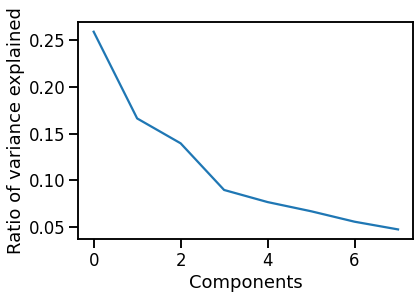

In [84]:
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_)
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")

Here we can see that after 4 components, the following ones provide less than
10\% of information. Therefore we can choose between 4 or 5 components.

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(melb_df_num)
proyected_features = pca.transform(melb_df_num)

In [86]:
pca.explained_variance_ratio_

array([0.25909312, 0.16623993, 0.13960034, 0.08963461])

## Combining numerical and categorical variables

Additionally, we can combine the features obtained from the PCA and the OHE
algorithms. We ended up with two numpy matrices of the following shapes:

`numpy` is a python library that offers comprehensive mathematical functions,
random number generators, linear algebra routines, and a lot more! That's why
most of the machine learning libraries depend on `numpy` as the defacto
functionality to develop algorithms.

In [90]:
proyected_features.shape

(10696, 4)

In [91]:
melb_df_enc.todense().shape

(10696, 362)


We can combine these two matrices using stack operations. You can stack two or
more matrices horizontally (`hstack`) or vertically (`vstack`). As we want to
combine categorical and numerical features while keeping the same number of
rows, we need to use `hstack`.

In [92]:
import numpy as np
np.hstack([proyected_features, melb_df_enc.todense()]).shape

(10696, 366)

Finally, we can create a pandas dataframe, adding column names to the final
matrix. The instances of OHE and PCA contain the name of the encoded categories
and the number of components used.

In [93]:
features = np.hstack([proyected_features, melb_df_enc.todense()])
categ_ohe = np.concatenate(ohe.categories_).tolist()
categ_pca = [f"pca_{comp}" for comp in range(pca.n_components_)]

In [94]:
import pandas as pd
merged_features = pd.DataFrame(features, columns=categ_pca + categ_ohe)

In [95]:
merged_features

,pca_0,pca_1,pca_2,pca_3,Abbotsford,Aberfeldie,Airport West,Albert Park,Albion,Altona,Altona North,Armadale,Ascot Vale,Ashburton,Ashwood,Avondale Heights,Balwyn,Balwyn North,Bentleigh,Bentleigh East,Box Hill,Braybrook,Brighton,Brighton East,Brunswick,Brunswick East,Brunswick West,Bulleen,Burwood,Camberwell,Carlton,Carlton North,Carnegie,Caulfield South,Cheltenham,Clifton Hill,Coburg,Coburg North,Collingwood,Craigieburn,Doncaster,Doncaster East,Elsternwick,Elwood,Epping,Essendon,Fairfield,Fawkner,Fitzroy,Fitzroy North,Flemington,Footscray,Glen Iris,Glen Waverley,Glenroy,Hadfield,Hampton,Hawthorn,Hawthorn East,Heidelberg,Heidelberg Heights,Heidelberg West,Ivanhoe,Keilor East,Kensington,Kew,Kew East,Lalor,Maidstone,Malvern,Malvern East,Maribyrnong,Melbourne,Mill Park,Moonee Ponds,Moorabbin,Mount Waverley,Murrumbeena,Newport,Niddrie,North Melbourne,Northcote,Oak Park,Oakleigh,Oakleigh South,Ormond,Pascoe Vale,Port Melbourne,Prahran,Preston,Reservoir,Richmond,Rosanna,Seddon,South Melbourne,South Yarra,Southbank,St Kilda,Strathmore,Sunshine,Sunshine North,Sunshine West,Surrey Hills,Templestowe Lower,Thornbury,Toorak,Viewbank,Watsonia,Werribee,West Footscray,Williamstown,Windsor,Yarraville,h,t,u,PI,S,SA,SP,VB,@Realty,ASL,Abercromby's,Ace,Alexkarbon,Allens,Anderson,Ascend,Assisi,Australian,Barlow,Barry,Bayside,Bekdon,Beller,Bells,Besser,Better,Biggin,Blue,Brace,Brad,Buckingham,Bullen,Burnham,Buxton,Buxton/Advantage,Buxton/Find,C21,CASTRAN,Caine,Calder,Castran,Cayzer,Century,Chambers,Changing,Charlton,Chisholm,Christopher,Clairmont,Collins,Compton,Conquest,Considine,Coventry,Craig,Crane,D'Aprano,Darren,David,Del,Dingle,Direct,Dixon,Domain,Douglas,Edward,Elite,Eview,FN,First,Fletchers,Fletchers/One,Follett,Frank,GL,Galldon,Garvey,Gary,Geoff,Grantham,Greg,Gunn&Co,HAR,Hall,Ham,Harcourts,Harrington,Haughton,Hayeswinckle,Hodges,Holland,Homes,Hooper,Hunter,Iconek,J,JMRE,JRW,Jas,Jason,Jellis,Joe,Johnston,Kay,Kelly,Ken,LITTLE,LJ,LLC,Langwell,Leased,Lindellas,Love,Lucas,Luxe,Luxton,MICM,Maddison,Mandy,Marshall,Mason,Matthew,Max,McDonald,McGrath,McNaughton,Meadows,Melbourne,Miles,Millership,Moonee,Morleys,Morrison,Naison,Nardella,Nelson,New,Nguyen,Nicholson,Nick,Noel,North,O'Brien,O'Donoghues,Obrien,One,Oriental,Owen,PRD,Pagan,Parkes,Parkinson,Paul,Peter,Philip,Pride,Prime,Private/Tiernan's,Prof.,Property,Propertyau,Prowse,Purplebricks,R&H,RE,RT,RW,Raine,Raine&Horne,Ray,Re,Reach,Real,Red,Redina,Reed,Reliance,Rendina,Ristic,Rodney,Roger,Rosin,Ross,Rounds,S&L,Scott,Sotheby's,Steveway,Stockdale,Sweeney,Sweeney/Advantage,Thomas,Thomson,Tiernan's,Tim,Trimson,Triwest,Upper,VICPROP,VICProp,Vic,Victory,Village,W.B.,WHITEFOX,Walsh,Walshe,Weda,Weston,White,Whiting,William,Williams,Wilson,Win,Wood,Woodards,Xynergy,YPA,Zahn,buyMyplace,hockingstuart,hockingstuart/Advantage,hockingstuart/Barry,hockingstuart/Village,iOne,iTRAK,Banyule,Bayside,Boroondara,Brimbank,Darebin,Glen Eira,Hobsons Bay,Hume,Kingston,Manningham,Maribyrnong,Melbourne,Monash,Moonee Valley,Moreland,Port Phillip,Stonnington,Unavailable,Whitehorse,Whittlesea,Wyndham,Yarra,Grouped Eastern Metropolitan,Northern Metropolitan,Southern Metropolitan,Western Metropolitan
0,-1.172107,-0.109683,-1.505687,1.513821,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,